In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.io

In [21]:
%pwd

'/users/aduwenye/ondemand'

In [22]:
df = pd.read_csv('x70A_steel_fatigue_crack_growth.csv') #X70
df

,K,dadN,P,Label
0,9.489228,0.000005,0.0,x70A_0
1,9.926499,0.000005,0.0,x70A_0
2,10.127255,0.000005,0.0,x70A_0
3,10.332071,0.000006,0.0,x70A_0
4,10.754215,0.000007,0.0,x70A_0
...,...,...,...,...
233,20.927104,0.001711,5.5,x70A_5
234,19.413348,0.001359,5.5,x70A_5
235,22.558895,0.002268,5.5,x70A_5
236,21.673374,0.001945,5.5,x70A_5


In [23]:
df.shape

(238, 4)

In [24]:
df = df.drop('Label',axis=1)
df

,K,dadN,P
0,9.489228,0.000005,0.0
1,9.926499,0.000005,0.0
2,10.127255,0.000005,0.0
3,10.332071,0.000006,0.0
4,10.754215,0.000007,0.0
...,...,...,...
233,20.927104,0.001711,5.5
234,19.413348,0.001359,5.5
235,22.558895,0.002268,5.5
236,21.673374,0.001945,5.5


In [25]:
df = df[df['P']>0]
df = df[(df['P']<10) | (df['P']>30)] #sorting out dummies
df = df.sample(frac=1).reset_index(drop=True)
X = df.drop('dadN',axis=1)
y = df['dadN']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1)

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

(107, 2)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae') 

In [30]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=2,epochs=1500) 

Epoch 1/1500
54/54 [==============================] - 2s 5ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 2/1500
54/54 [==============================] - 0s 3ms/step - loss: 8.5345e-04 - val_loss: 4.6853e-04
Epoch 3/1500
54/54 [==============================] - 0s 3ms/step - loss: 5.3741e-04 - val_loss: 0.0013
Epoch 4/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 6.5193e-04
Epoch 5/1500
54/54 [==============================] - 0s 3ms/step - loss: 8.9667e-04 - val_loss: 3.7486e-04
Epoch 6/1500
54/54 [==============================] - 0s 3ms/step - loss: 4.9912e-04 - val_loss: 3.2474e-04
Epoch 7/1500
54/54 [==============================] - 0s 3ms/step - loss: 4.5236e-04 - val_loss: 4.3251e-04
Epoch 8/1500
54/54 [==============================] - 0s 3ms/step - loss: 5.2678e-04 - val_loss: 9.8125e-04
Epoch 9/1500
54/54 [==============================] - 0s 3ms/step - loss: 7.1731e-04 - val_loss: 9.9017e-04
Epoch 10/1500
54/54 [=======================

Epoch 151/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.2458e-04 - val_loss: 2.6204e-04
Epoch 152/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.3875e-04 - val_loss: 1.4967e-04
Epoch 153/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.3927e-04 - val_loss: 5.9337e-05
Epoch 154/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.8433e-04 - val_loss: 7.2896e-05
Epoch 155/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.6478e-04 - val_loss: 3.0067e-04
Epoch 156/1500
54/54 [==============================] - 0s 3ms/step - loss: 5.7941e-04 - val_loss: 5.2799e-04
Epoch 157/1500
54/54 [==============================] - 0s 3ms/step - loss: 3.3721e-04 - val_loss: 2.3445e-04
Epoch 158/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.0552e-04 - val_loss: 6.8582e-04
Epoch 159/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.7082e-04 - val_loss: 4.6549e-04
Epoch 160/

54/54 [==============================] - 0s 3ms/step - loss: 1.7585e-04 - val_loss: 1.5659e-04
Epoch 300/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.6349e-04 - val_loss: 5.7538e-05
Epoch 301/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.1806e-04 - val_loss: 4.1347e-04
Epoch 302/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.4009e-04 - val_loss: 1.6670e-04
Epoch 303/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.1429e-04 - val_loss: 4.7113e-04
Epoch 304/1500
54/54 [==============================] - 0s 3ms/step - loss: 3.3863e-04 - val_loss: 9.9555e-05
Epoch 305/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.0605e-04 - val_loss: 3.4303e-04
Epoch 306/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.0867e-04 - val_loss: 3.6381e-05
Epoch 307/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.6935e-04 - val_loss: 5.4279e-05
Epoch 308/1500
54/54 [===

54/54 [==============================] - 0s 3ms/step - loss: 1.2627e-04 - val_loss: 1.1727e-04
Epoch 448/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.3263e-04 - val_loss: 1.2169e-04
Epoch 449/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.5877e-04 - val_loss: 1.5833e-04
Epoch 450/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.4779e-04 - val_loss: 2.6533e-04
Epoch 451/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.0542e-04 - val_loss: 2.6645e-04
Epoch 452/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.4271e-04 - val_loss: 1.7095e-04
Epoch 453/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.5492e-04 - val_loss: 6.2345e-05
Epoch 454/1500
54/54 [==============================] - 0s 3ms/step - loss: 9.6474e-05 - val_loss: 2.3433e-04
Epoch 455/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.4937e-04 - val_loss: 3.2391e-04
Epoch 456/1500
54/54 [===

54/54 [==============================] - 0s 3ms/step - loss: 2.0442e-04 - val_loss: 8.4112e-05
Epoch 596/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.4990e-04 - val_loss: 2.8117e-04
Epoch 597/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.3882e-04 - val_loss: 1.6070e-04
Epoch 598/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.9751e-04 - val_loss: 3.5688e-05
Epoch 599/1500
54/54 [==============================] - 0s 3ms/step - loss: 9.3855e-05 - val_loss: 4.4351e-05
Epoch 600/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.5434e-04 - val_loss: 3.6493e-04
Epoch 601/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.8467e-04 - val_loss: 4.6760e-05
Epoch 602/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.5198e-04 - val_loss: 1.1226e-04
Epoch 603/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.2658e-04 - val_loss: 3.3008e-04
Epoch 604/1500
54/54 [===

54/54 [==============================] - 0s 3ms/step - loss: 1.5940e-04 - val_loss: 7.3050e-05
Epoch 744/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.1351e-04 - val_loss: 1.6213e-04
Epoch 745/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.2185e-04 - val_loss: 7.3067e-05
Epoch 746/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.9313e-04 - val_loss: 1.1007e-04
Epoch 747/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.0740e-04 - val_loss: 2.3902e-04
Epoch 748/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.3887e-04 - val_loss: 2.6795e-04
Epoch 749/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.3189e-04 - val_loss: 9.5270e-05
Epoch 750/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.3724e-04 - val_loss: 4.8047e-05
Epoch 751/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.4548e-04 - val_loss: 6.1577e-05
Epoch 752/1500
54/54 [===

54/54 [==============================] - 0s 3ms/step - loss: 1.4374e-04 - val_loss: 1.8055e-04
Epoch 892/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.2198e-04 - val_loss: 8.8334e-05
Epoch 893/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.5377e-04 - val_loss: 3.4056e-04
Epoch 894/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.5267e-04 - val_loss: 1.1463e-04
Epoch 895/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.0711e-04 - val_loss: 9.6784e-05
Epoch 896/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.0128e-04 - val_loss: 2.3370e-04
Epoch 897/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.9117e-04 - val_loss: 1.4272e-04
Epoch 898/1500
54/54 [==============================] - 0s 3ms/step - loss: 9.4791e-05 - val_loss: 4.6094e-05
Epoch 899/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.3351e-04 - val_loss: 3.0767e-05
Epoch 900/1500
54/54 [===

54/54 [==============================] - 0s 3ms/step - loss: 1.6937e-04 - val_loss: 4.0015e-05
Epoch 1040/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.5843e-04 - val_loss: 1.2900e-04
Epoch 1041/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.3107e-04 - val_loss: 6.3947e-05
Epoch 1042/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.6517e-04 - val_loss: 2.2537e-05
Epoch 1043/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.4445e-04 - val_loss: 8.9034e-05
Epoch 1044/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.9506e-04 - val_loss: 7.0074e-05
Epoch 1045/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.7404e-04 - val_loss: 2.2919e-04
Epoch 1046/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.0362e-04 - val_loss: 1.1080e-04
Epoch 1047/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.9896e-04 - val_loss: 3.0138e-04
Epoch 1048/1500
5

Epoch 1113/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.9438e-04 - val_loss: 9.4431e-05
Epoch 1114/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.0937e-04 - val_loss: 1.9972e-04
Epoch 1115/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.6250e-04 - val_loss: 4.8993e-05
Epoch 1116/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.7017e-04 - val_loss: 4.2025e-05
Epoch 1117/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.3538e-04 - val_loss: 3.3548e-05
Epoch 1118/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.9003e-04 - val_loss: 7.1036e-05
Epoch 1119/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.2919e-04 - val_loss: 1.7176e-04
Epoch 1120/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.1435e-04 - val_loss: 7.6481e-05
Epoch 1121/1500
54/54 [==============================] - 0s 3ms/step - loss: 3.0770e-04 - val_loss: 2.6350e-04
E

Epoch 1187/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.5907e-04 - val_loss: 1.0687e-04
Epoch 1188/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.4435e-04 - val_loss: 1.3757e-04
Epoch 1189/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.9633e-04 - val_loss: 5.9235e-05
Epoch 1190/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.0139e-04 - val_loss: 1.9703e-04
Epoch 1191/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.2551e-04 - val_loss: 4.3176e-04
Epoch 1192/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.1819e-04 - val_loss: 1.0390e-04
Epoch 1193/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.5911e-04 - val_loss: 3.6696e-04
Epoch 1194/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.2067e-04 - val_loss: 2.1317e-04
Epoch 1195/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.5955e-04 - val_loss: 1.1367e-04
E

Epoch 1261/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.4163e-04 - val_loss: 2.3880e-04
Epoch 1262/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.1671e-04 - val_loss: 3.3918e-04
Epoch 1263/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.2397e-04 - val_loss: 1.5945e-04
Epoch 1264/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.2819e-04 - val_loss: 6.3769e-05
Epoch 1265/1500
54/54 [==============================] - 0s 3ms/step - loss: 9.3607e-05 - val_loss: 3.3907e-04
Epoch 1266/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.1668e-04 - val_loss: 3.1154e-04
Epoch 1267/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.8566e-04 - val_loss: 6.4721e-05
Epoch 1268/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.1328e-04 - val_loss: 7.9306e-05
Epoch 1269/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.3879e-04 - val_loss: 1.3145e-04
E

Epoch 1335/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.7260e-04 - val_loss: 1.2882e-04
Epoch 1336/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.1368e-04 - val_loss: 1.0194e-04
Epoch 1337/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.9431e-04 - val_loss: 3.2238e-04
Epoch 1338/1500
54/54 [==============================] - 0s 3ms/step - loss: 2.1438e-04 - val_loss: 5.6527e-04
Epoch 1339/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.8138e-04 - val_loss: 6.9947e-05
Epoch 1340/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.1766e-04 - val_loss: 7.9409e-05
Epoch 1341/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.1865e-04 - val_loss: 2.6547e-05
Epoch 1342/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.6376e-04 - val_loss: 1.3404e-04
Epoch 1343/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.0242e-04 - val_loss: 1.1032e-04
E

Epoch 1409/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.0924e-04 - val_loss: 7.7275e-05
Epoch 1410/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.6254e-04 - val_loss: 1.6188e-04
Epoch 1411/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.9687e-04 - val_loss: 2.6311e-04
Epoch 1412/1500
54/54 [==============================] - 0s 3ms/step - loss: 3.4260e-04 - val_loss: 3.1473e-04
Epoch 1413/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.4861e-04 - val_loss: 1.4678e-04
Epoch 1414/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.5836e-04 - val_loss: 1.4358e-04
Epoch 1415/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.1856e-04 - val_loss: 1.4547e-04
Epoch 1416/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.5764e-04 - val_loss: 4.4423e-05
Epoch 1417/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.5106e-04 - val_loss: 3.2062e-04
E

Epoch 1483/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.1966e-04 - val_loss: 2.2773e-04
Epoch 1484/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.4003e-04 - val_loss: 4.4638e-05
Epoch 1485/1500
54/54 [==============================] - 0s 3ms/step - loss: 8.5779e-05 - val_loss: 4.3843e-05
Epoch 1486/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.0697e-04 - val_loss: 1.4613e-04
Epoch 1487/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.3902e-04 - val_loss: 1.9724e-04
Epoch 1488/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.6228e-04 - val_loss: 2.0773e-04
Epoch 1489/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.3258e-04 - val_loss: 6.5823e-05
Epoch 1490/1500
54/54 [==============================] - 0s 3ms/step - loss: 1.3928e-04 - val_loss: 8.6607e-05
Epoch 1491/1500
54/54 [==============================] - 0s 3ms/step - loss: 7.5450e-05 - val_loss: 2.5919e-05
E

<Axes: >

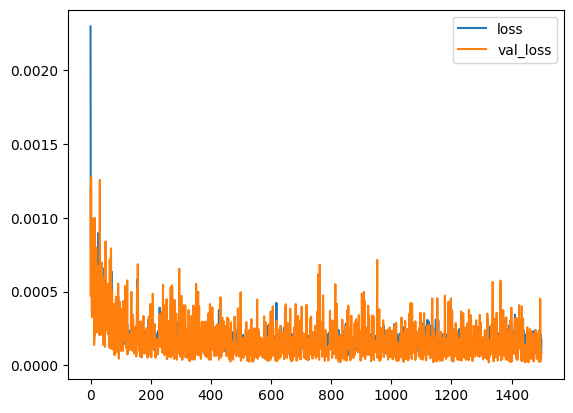

In [31]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
X_test

array([[0.36706005, 1.        ],
       [0.10335804, 1.        ],
       [0.37673946, 1.        ],
       [0.1768878 , 1.        ],
       [0.38651626, 0.        ],
       [0.20441233, 0.        ],
       [0.04318986, 1.        ],
       [0.41644084, 0.        ],
       [0.80536216, 1.        ],
       [0.50627479, 0.        ],
       [0.86989019, 1.        ],
       [0.06926321, 1.        ],
       [0.11392375, 0.        ],
       [0.13920295, 1.        ],
       [0.31552127, 1.        ],
       [0.08951498, 0.        ],
       [0.69113002, 0.        ],
       [0.59810088, 1.        ],
       [0.14658977, 1.        ]])

In [33]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 66ms/step


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


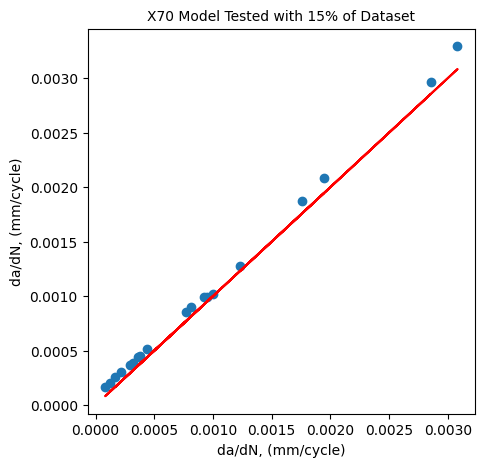

In [58]:
csfont = {'fontname':'Arial'}
hfont = {'fontname':'Times New Roman'}

# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(5,5))

# Our predictions
plt.scatter(y_test,predictions)


# Perfect predictions
plt.plot(y_test,y_test,'r')

#plt.legend().set_visible(False)
plt.xlabel('da/dN, (mm/cycle)',**csfont, fontsize=10);
plt.ylabel('da/dN, (mm/cycle)',**csfont, fontsize=10);
plt.title('X70 Model Tested with 15% of Dataset', fontsize=10) #wrong title
#L.get_texts()[0].set_text('make it short')
#plt.savefig('diff_ran_frz.svg')
plt.show()


In [18]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# https://stackoverflow.com/questions/21321670/how-to-change-fonts-in-matplotlib-python
# https://scentellegher.github.io/visualization/2018/05/02/custom-fonts-matplotlib.html
# https://github.com/scentellegher/code_snippets/blob/master/matplotlib_font/Matplotlib_custom_font.ipynb

['/usr/share/fonts/urw-base35/NimbusSans-Regular.otf',
 '/usr/share/fonts/urw-base35/NimbusSansNarrow-BoldOblique.otf',
 '/usr/share/fonts/urw-base35/P052-Bold.otf',
 '/usr/share/fonts/urw-base35/NimbusSans-BoldItalic.otf',
 '/usr/share/fonts/abattis-cantarell/Cantarell-Oblique.otf',
 '/usr/share/fonts/google-droid/DroidSans.ttf',
 '/usr/share/fonts/abattis-cantarell/Cantarell-Regular.otf',
 '/usr/share/fonts/google-droid/DroidSansArabic.ttf',
 '/usr/share/fonts/google-droid/DroidSans-Bold.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansMono.ttf',
 '/usr/share/fonts/urw-base35/NimbusMonoPS-Italic.otf',
 '/usr/share/fonts/google-droid/DroidSansFallback.ttf',
 '/usr/share/fonts/abattis-cantarell/Cantarell-Bold.otf',
 '/usr/share/fonts/google-droid/DroidSansArmenian.ttf',
 '/usr/share/fonts/google-droid/DroidSansTamil-Regular.ttf',
 '/usr/share/fonts/google-droid/DroidSansHebrew-Bold.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansMono-BoldOblique.ttf',
 '/usr/share/fonts/urw-base35/C059-Bold.otf',
 

In [36]:
cf = pd.read_csv('x70A_steel_fatigue_crack_growth.csv')
cf = cf.drop('Label',axis=1)
cfg = cf[(cf['P']>10) & (cf['P']<30)]
cfg

,K,dadN,P
52,10.20,0.00001,12.0
53,10.45,0.00006,12.0
54,10.70,0.00011,12.0
55,10.95,0.00016,12.0
56,11.20,0.00021,12.0
57,11.45,0.00026,12.0
58,11.70,0.00031,12.0
59,11.95,0.00036,12.0
60,12.20,0.00041,12.0
61,12.45,0.00046,12.0


In [37]:
Xt = cfg.drop('dadN',axis=1)
yt = cfg['dadN']

In [38]:
Xt = scaler.transform(Xt)
pred = model.predict(Xt)

2/2 [==============================] - 0s 2ms/step


In [40]:
len(cfg)

60

In [41]:
val = []
for idz in range(len(cfg)):
    cone_data_pred = cfg.drop('dadN',axis=1).loc[52+idz]
    cone_data_pred = scaler.transform(cone_data_pred.values.reshape(-1, 2))
    outp = model.predict(cone_data_pred)
    val.append(outp[0]);
    
    #cone_data_pred

1/1 [==============================] - 0s 17ms/step


/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step


/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step


/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step


/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step


/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step


/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step


/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


In [42]:
print(len(val))

60


In [43]:
K = cfg.drop('dadN',axis=1)
KK = K.drop('P',axis=1)
KK

,K
52,10.20
53,10.45
54,10.70
55,10.95
56,11.20
57,11.45
58,11.70
59,11.95
60,12.20
61,12.45


In [45]:
#val.to_csv('val.csv')

# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to csv file
savetxt('val.csv', val, delimiter=',')

In [46]:
# load numpy array from csv file
from numpy import loadtxt
# load array
data5 = loadtxt('x70A_5_5.csv', delimiter=',')
data34 = loadtxt('x70A_34.csv', delimiter=',')
data12 = loadtxt('val.csv', delimiter=',')
# print the array
print(data5[1])

[1.01780752e+01 1.22712524e-05]


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


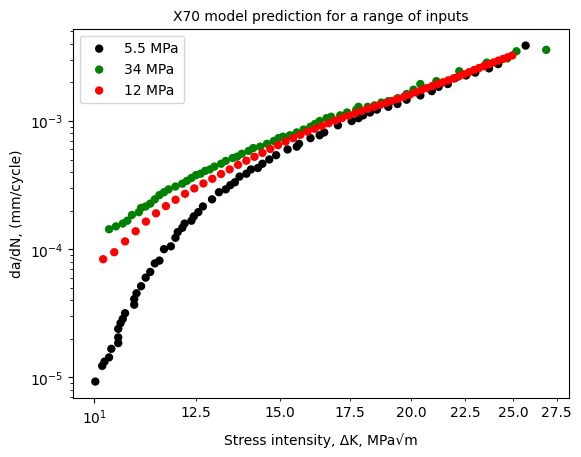

In [61]:
from matplotlib import ticker as mticker

fig = plt.figure()
ax = plt.gca()
ax.scatter(data5[:,0], data5[:,1], c='black', edgecolors='none', label="5.5 MPa") #experiment
ax.scatter(data34[:,0], data34[:,1], c='green', edgecolors='none', label="34 MPa") #experiment
ax.scatter(KK, val, c='red', edgecolors='none', label="12 MPa") #prediction
ax.set_yscale('log')
ax.set_xscale('log')

#plt.legend().set_visible(False)
plt.xlabel('Stress intensity, ΔK, MPa√m',**csfont, fontsize=10);
plt.ylabel('da/dN, (mm/cycle)',**csfont, fontsize=10);
plt.title('X70 model prediction for a range of inputs', fontsize=10)
#L.get_texts()[0].set_text('make it short')
#plt.savefig('diff_ran_frz.svg')
#ax.ticklabel_format(use_scientific=False)
ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())

plt.legend(loc="upper left")
plt.show()